In [2]:
import pandas as pd
import numpy as np
from itertools import product
from ast import literal_eval
import seaborn as sns
import random
import matplotlib.pyplot as plt
import copy

In [3]:
pubs_author_funder = pd.read_csv("..//..//..//data//Data//DerivedData//CleanedRawData//pubs_author_funder.csv")
pubs_author_funder['author_country'] = pubs_author_funder['author_country'].apply(literal_eval)
pubs_author_funder['funder_country'] = pubs_author_funder['funder_country'].apply(
    lambda x: literal_eval(x) if pd.notnull(x) else x)

FileNotFoundError: [Errno 2] No such file or directory: '..//..//..//data//Data//DerivedData//CleanedRawData//pubs_author_funder.csv'

In [5]:
pubs_author_funder['funder_country'] = pubs_author_funder['funder_country'].fillna(0)
pubs_author_funder['funder_country'] = pubs_author_funder['funder_country'].fillna(0)
pubs_author_funder['funded']=pubs_author_funder['funder_country'].apply(
    lambda x: 1 if x!=0 else 0)
pubs_author_funder.head()

,id,author_country,funder_country,discipline,year,rel_citation,citation,funded
0,30507292,[Turkey],[Turkey],77,2009,0.485,6,1
1,30574690,"[United States, France]","[United States, United States, United States, ...",83,2009,0.703,9,1
2,30574691,[Russia],[Russia],83,2009,0.312,4,1
3,30585095,"[Spain, Spain]","[Spain, Spain, Spain, Spain, Spain, Spain]",89,2009,0.137,1,1
4,30585097,"[Germany, Spain]",[Spain],89,2009,0.410,3,1


In [6]:
pubs_author_funder['author_distinct']=pubs_author_funder['author_country'].apply(
lambda x:list(set(x)))
pubs_author_funder.head()

,id,author_country,funder_country,discipline,year,rel_citation,citation,funded,author_distinct
0,30507292,[Turkey],[Turkey],77,2009,0.485,6,1,[Turkey]
1,30574690,"[United States, France]","[United States, United States, United States, ...",83,2009,0.703,9,1,"[France, United States]"
2,30574691,[Russia],[Russia],83,2009,0.312,4,1,[Russia]
3,30585095,"[Spain, Spain]","[Spain, Spain, Spain, Spain, Spain, Spain]",89,2009,0.137,1,1,[Spain]
4,30585097,"[Germany, Spain]",[Spain],89,2009,0.410,3,1,"[Germany, Spain]"


In [7]:
author_df=pubs_author_funder.explode("author_distinct")
author_df.head()

,id,author_country,funder_country,discipline,year,rel_citation,citation,funded,author_distinct
0,30507292,[Turkey],[Turkey],77,2009,0.485,6,1,Turkey
1,30574690,"[United States, France]","[United States, United States, United States, ...",83,2009,0.703,9,1,France
1,30574690,"[United States, France]","[United States, United States, United States, ...",83,2009,0.703,9,1,United States
2,30574691,[Russia],[Russia],83,2009,0.312,4,1,Russia
3,30585095,"[Spain, Spain]","[Spain, Spain, Spain, Spain, Spain, Spain]",89,2009,0.137,1,1,Spain


In [8]:
author_df['funder_distinct']=author_df['funder_country'].apply(
    lambda x:list(set(x)) if x!=0 else 0)

In [9]:
cntry_author_df = author_df.groupby(['author_distinct','discipline']).size()
cntry_author_df.head()

author_distinct  discipline
Afghanistan      1             24
                 2             12
                 3              5
                 4              7
                 5              1
dtype: int64

In [10]:
cntry_author_df = cntry_author_df.reset_index()
cntry_author_df.columns=['country','discipline','count']
cntry_author_df.head()

,country,discipline,count
0,Afghanistan,1,24
1,Afghanistan,2,12
2,Afghanistan,3,5
3,Afghanistan,4,7
4,Afghanistan,5,1


In [11]:
cntry_author_df = cntry_author_df.pivot(index="country",columns="discipline",values='count')
cntry_author_df = cntry_author_df.fillna(0)
cntry_author_df.head()

discipline,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,24.0,12.0,5.0,7.0,1.0,0.0,3.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Albania,64.0,60.0,6.0,15.0,5.0,7.0,16.0,23.0,2.0,2.0,...,4.0,0.0,7.0,1.0,0.0,9.0,1.0,5.0,2.0,0.0
Algeria,748.0,437.0,79.0,167.0,131.0,59.0,122.0,115.0,13.0,41.0,...,221.0,64.0,896.0,280.0,333.0,1443.0,15.0,291.0,660.0,403.0
Andorra,0.0,4.0,0.0,2.0,3.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Angola,12.0,24.0,1.0,9.0,6.0,0.0,12.0,18.0,3.0,2.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [12]:
cntry_fund_df=pd.DataFrame()
cntrylist=author_df.author_distinct.unique().tolist()
for cntry in cntrylist:
    cntry_df=author_df[author_df.author_distinct==cntry]
    cntry_df=cntry_df.explode('funder_distinct')
    cntry_df=cntry_df[cntry_df.funder_distinct==cntry]
    cntry_df=cntry_df.groupby(['funder_distinct','discipline']).size().reset_index()
    cntry_fund_df=pd.concat([cntry_fund_df,cntry_df])
cntry_fund_df.columns=['funder_distinct','discipline','count']

In [13]:
cntry_fund_df=cntry_fund_df.pivot(index='funder_distinct',columns='discipline',
                                 values='count')
cntry_fund_df.head()

discipline,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,91.0,92.0,93.0,94.0,95.0,96.0,97.0,98.0,99.0,100.0
funder_distinct,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Algeria,111.0,64.0,11.0,16.0,13.0,2.0,12.0,11.0,NaN,7.0,...,11.0,5.0,50.0,23.0,12.0,119.0,NaN,53.0,36.0,40.0
Andorra,NaN,1.0,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Angola,1.0,3.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
cntry_fund_df=cntry_fund_df.fillna(0)
cntry_fund_df.head()

discipline,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,91.0,92.0,93.0,94.0,95.0,96.0,97.0,98.0,99.0,100.0
funder_distinct,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Albania,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Algeria,111.0,64.0,11.0,16.0,13.0,2.0,12.0,11.0,0.0,7.0,...,11.0,5.0,50.0,23.0,12.0,119.0,0.0,53.0,36.0,40.0
Andorra,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Angola,1.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
from itertools import product
cntrylist=cntry_fund_df.index
dcplinelist=cntry_fund_df.columns

In [16]:
cntry_ratio_df=pd.DataFrame(index=cntry_author_df.index,columns=cntry_author_df.columns)
for cntry, dscp in product(cntrylist,dcplinelist):
    pubcnt=cntry_author_df.loc[cntry,dscp]
    if pubcnt==0:
        cntry_ratio_df.loc[cntry,dscp]=0
    else:
        fundcnt=cntry_fund_df.loc[cntry,dscp]
        cntry_ratio_df.loc[cntry,dscp]=fundcnt/pubcnt
cntry_ratio_df
        

discipline,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Albania,0.03125,0.0333333,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Algeria,0.148396,0.146453,0.139241,0.0958084,0.0992366,0.0338983,0.0983607,0.0956522,0,0.170732,...,0.0497738,0.078125,0.0558036,0.0821429,0.036036,0.0824671,0,0.182131,0.0545455,0.0992556
Andorra,0,0.25,0,0.5,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Angola,0.0833333,0.125,0,0,0,0,0,0.0555556,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,0.13738,0.13308,0.212121,0.22314,0.0729167,0.111842,0.0931373,0.178571,0.0217391,0.111111,...,0.131148,0,0.244444,0.329412,0.2,0.243333,0,0.203008,0.125,0.230769
Vietnam,0.236699,0.251073,0.107143,0.202703,0.232558,0.195122,0.332737,0.211207,0.314815,0.230769,...,0.384615,0.529412,0.407108,0.376518,0.459459,0.399044,0.333333,0.283859,0.367164,0.56962
Yemen,0,0.107143,0,0,0,0,0,0,0.1,0,...,0,0,0.0444444,0,0,0,0,0,0,0.0454545


In [73]:
cntry_author_df.head()

discipline,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,24.0,12.0,5.0,7.0,1.0,0.0,3.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Albania,64.0,60.0,6.0,15.0,5.0,7.0,16.0,23.0,2.0,2.0,...,4.0,0.0,7.0,1.0,0.0,9.0,1.0,5.0,2.0,0.0
Algeria,748.0,437.0,79.0,167.0,131.0,59.0,122.0,115.0,13.0,41.0,...,221.0,64.0,896.0,280.0,333.0,1443.0,15.0,291.0,660.0,403.0
Andorra,0.0,4.0,0.0,2.0,3.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Angola,12.0,24.0,1.0,9.0,6.0,0.0,12.0,18.0,3.0,2.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [17]:
def gini_coef(alist):
    """ Gini Coefficient """
    cum_x = np.cumsum(sorted(np.append(alist, 0)))
    sum_x = cum_x[-1]
    xarray = np.array(range(0, len(cum_x))) / np.float(len(cum_x) - 1)
    yarray = cum_x / sum_x
    B = np.trapz(yarray, x=xarray)
    A = 0.5 - B
    return A / (A + B)


In [18]:
resultlist=[]
for index,row in cntry_ratio_df.iterrows():
    gini=gini_coef(row.values)
    resultlist.append([index,gini])

In [27]:
gini_df=pd.DataFrame(resultlist,columns=['COUNTRY','GINI'])
gini_df.head()

,COUNTRY,GINI
0,Afghanistan,0.989796
1,Albania,0.952782
2,Algeria,0.511095
3,Andorra,0.961358
4,Angola,0.887141


In [25]:
import geopandas as gp
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.axes_grid1 import make_axes_locatable
import sys

In [29]:
flag_table = pd.read_csv("country_WoS_ECI_WB_flags.tsv", sep="\t")
world_geo = gp.read_file("ne_50m_admin_0_countries.shp")[
    ['NAME', "ISO_A3", "geometry", "ADM0_A3", 'CONTINENT', 'SUBREGION']]

gini_merge = gini_df.merge(right=flag_table, left_on="COUNTRY", right_on="WoS")
gini_merge = gini_merge.merge(
    how="inner", right=world_geo, left_on="Code", right_on="ADM0_A3")

gini_merge = gini_merge[gini_merge.CONTINENT != "Antarctica"]
gini_merge['DIVERSITY'] = 1-gini_merge['GINI']
world_geo = world_geo[world_geo.CONTINENT != "Antarctica"]
gini_geo = gp.GeoDataFrame(gini_merge)

data_empty = world_geo[~(world_geo['ADM0_A3'].isin(gini_geo['ADM0_A3']))]


In [30]:
def plot_worldmap(ax, fig, basemap, data_empty, data, plotcolumn, cmap, vmax=1):
    """plot a basemap and color the country based on the column passed into
    """

    basemap.plot(ax=ax, linewidth=0.25, edgecolor='#8C8C8C', facecolor="#ffffff")
    data_empty.plot(ax=ax, linewidth=0.25, facecolor="#c4c0c0")
    data.plot(column=plotcolumn, cmap=cmap, vmin=0, vmax=vmax, ax=ax)
    ax.axis('off')
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="2%", pad=0.05)
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=vmax))
    sm._A = []
    fig.colorbar(sm, cax=cax)
    return fig, ax

/home/miaoli/conda/envs/funding/lib/python3.8/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


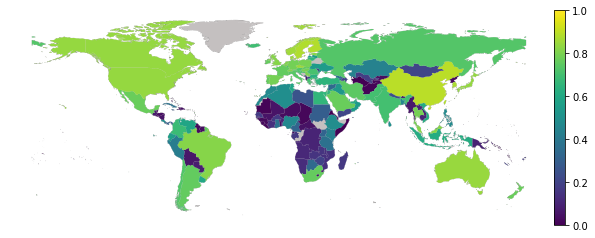

In [33]:
fig, ax = plt.subplots(1, figsize=(10, 6))
fig, ax = plot_worldmap(ax, fig, world_geo, data_empty, gini_geo, "DIVERSITY", cmap="viridis")
plt.savefig("worldmap.pdf",format="pdf")